In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import ttest_rel

load data and drop the target column cuz we don't use it

In [58]:
raw_data = pd.read_csv('/Users/erinburns/Library/CloudStorage/Box-Box/CoganLab/D_Data/GlobalLocal/combinedData.csv')
raw_data = raw_data.drop(columns=['target'])
responded_trials = raw_data[raw_data['partResponded'] == 1.0]

get error and correct trial counts and acc and rt

In [59]:
subject_stats = responded_trials.groupby('subject_ID').agg({
    'acc': ['mean', 'sum', 'count'],
    'RT': 'mean'
}).round(3)

# Flatten column names
subject_stats.columns = ['avg_acc', 'correct_trials', 'total_trials', 'avg_RT_all']
subject_stats['error_trials'] = subject_stats['total_trials'] - subject_stats['correct_trials']

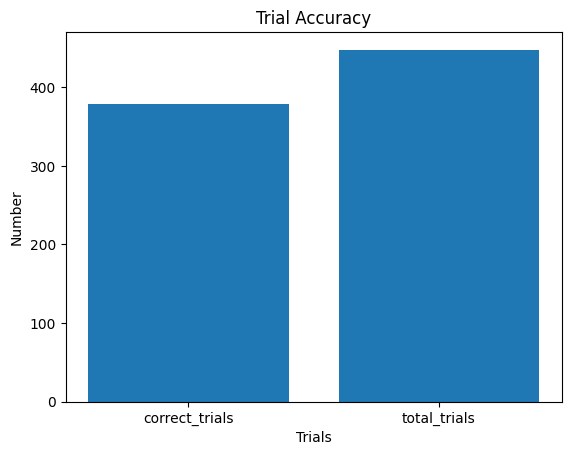

In [11]:
#plot acc
categories = ['correct_trials', 'total_trials']
values = subject_stats[categories].mean()

plt.bar(categories, values)

plt.xlabel('Trials')
plt.ylabel('Number')
plt.title('Trial Accuracy')

plt.show()

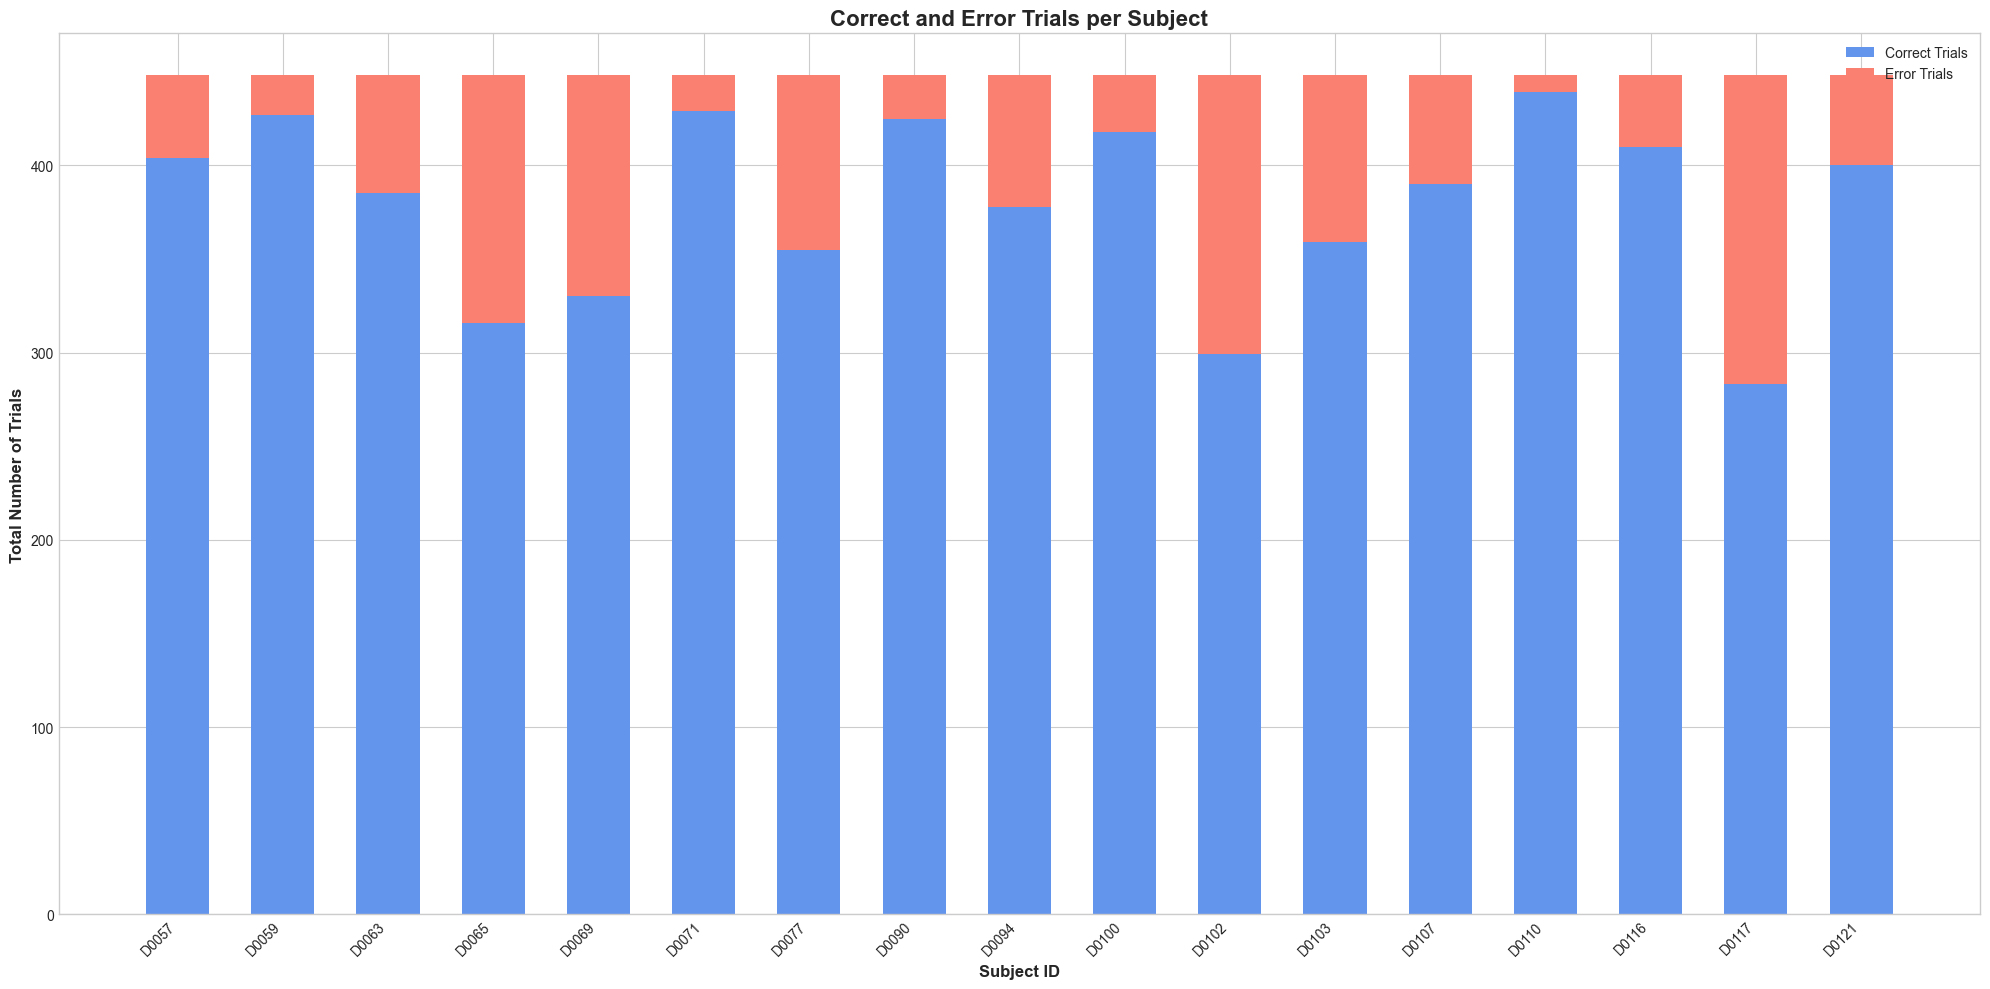

In [15]:
#acc and RT
mean_accuracy = subject_stats['avg_acc'].mean()
mean_rt = subject_stats['avg_RT_all'].mean()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# Define bar positions
index = np.arange(len(subject_stats.index))
bar_width = 0.6 # A single, wider bar for each subject

# Plot the "Correct Trials" as the bottom part of the stack
ax.bar(index, subject_stats['correct_trials'], bar_width, 
       label='Correct Trials', color='cornflowerblue')

# Plot the "Error Trials" on top of the correct trials
ax.bar(index, subject_stats['error_trials'], bar_width, 
       bottom=subject_stats['correct_trials'], 
       label='Error Trials', color='salmon')

# Set labels and title
ax.set_xlabel('Subject ID', fontweight='bold', fontsize=12)
ax.set_ylabel('Total Number of Trials', fontweight='bold', fontsize=12)
ax.set_title('Correct and Error Trials per Subject', fontweight='bold', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(subject_stats.index, rotation=45, ha="right")

# Add a legend
ax.legend(loc='upper right')

# Final adjustments and display
plt.tight_layout()
plt.show()


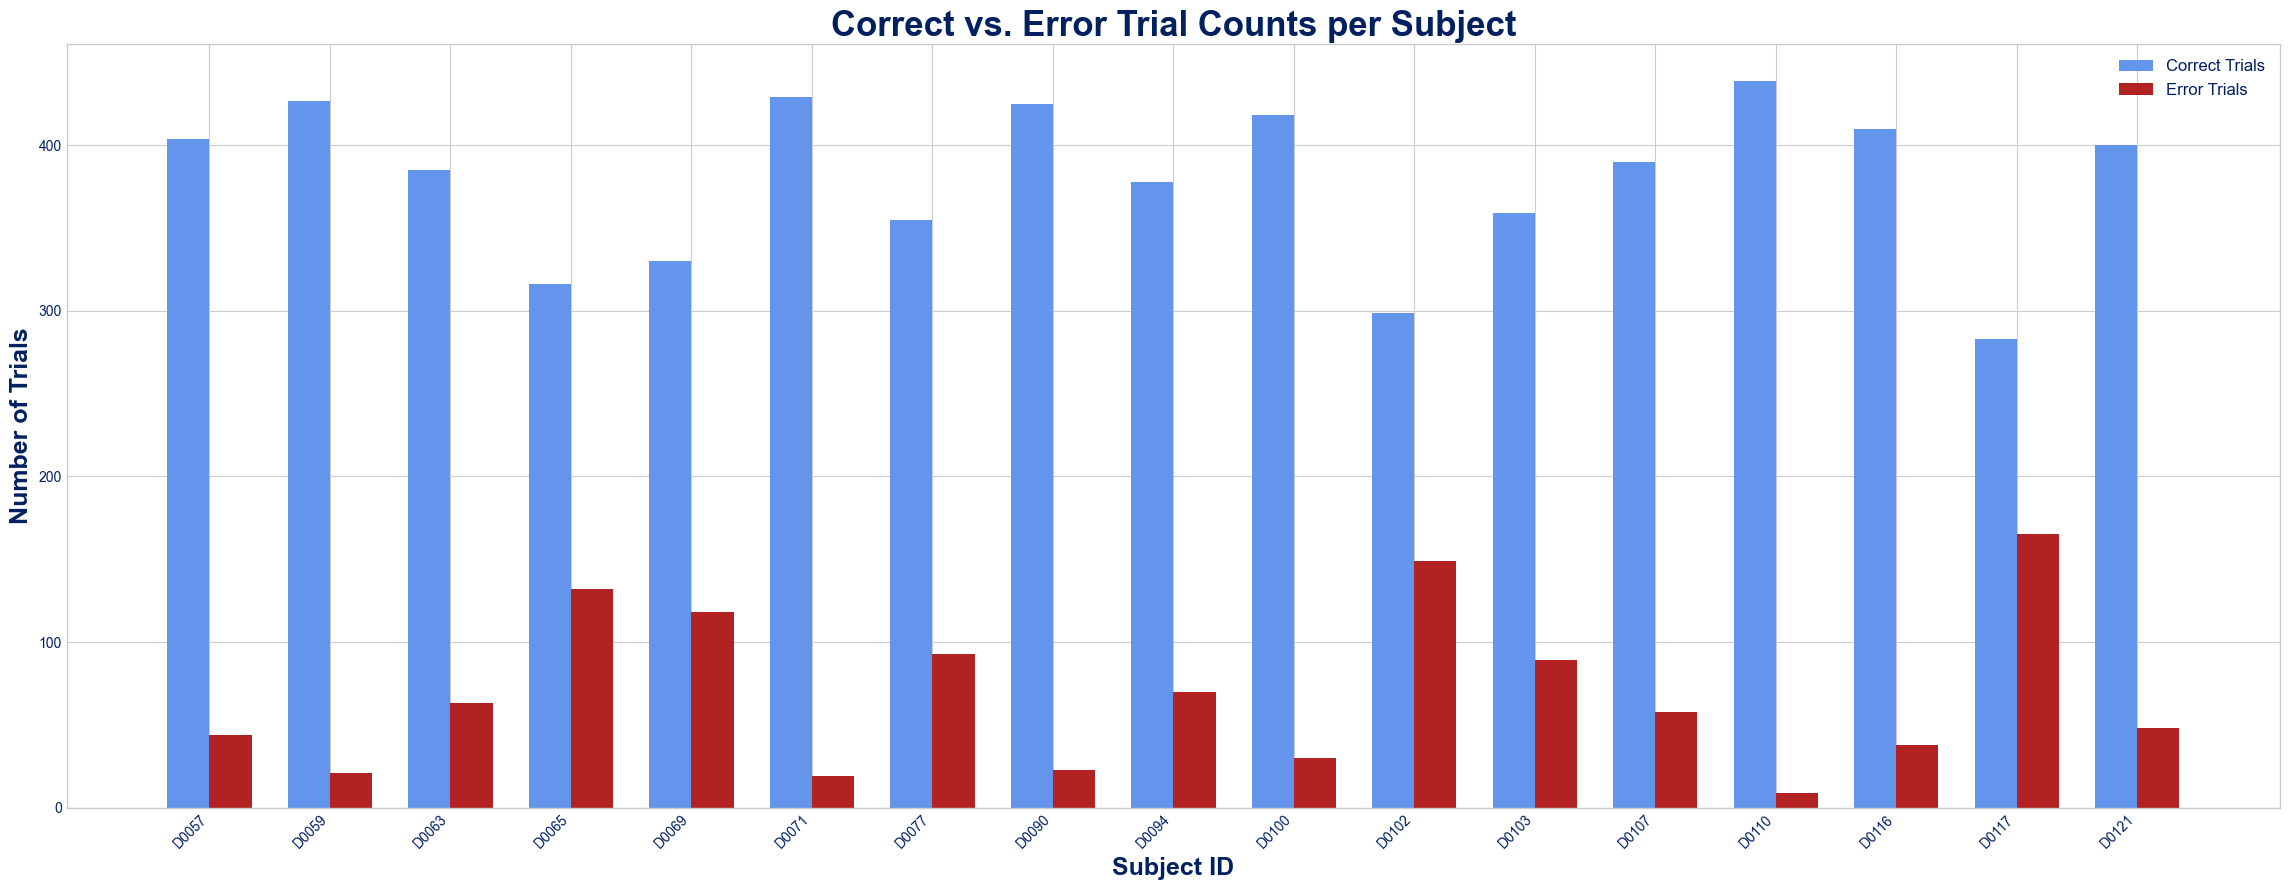

In [9]:
#bars separated
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(23, 9))
plt.style.use('seaborn-v0_8-whitegrid')

text_color = "#002060"

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(subject_stats.index))

# Plot bars for correct and error trials side-by-side
ax.bar(index - bar_width/2, subject_stats['correct_trials'], bar_width, label='Correct Trials', color='cornflowerblue')
ax.bar(index + bar_width/2, subject_stats['error_trials'], bar_width, label='Error Trials', color='firebrick')

# Set labels and title
ax.set_xlabel('Subject ID', fontweight='bold', fontsize=18, color=text_color)
ax.set_ylabel('Number of Trials', fontweight='bold', fontsize=18, color=text_color)
ax.set_title('Correct vs. Error Trial Counts per Subject', fontweight='bold', fontsize=25, color=text_color)
ax.set_xticks(index)
ax.set_xticklabels(subject_stats.index, rotation=45, ha="right")

ax.tick_params(axis='x', colors=text_color) 
ax.tick_params(axis='y', colors=text_color)

ax.legend(loc='upper right', fontsize=12, labelcolor=text_color)

# Final adjustments and display
plt.tight_layout()
plt.show()

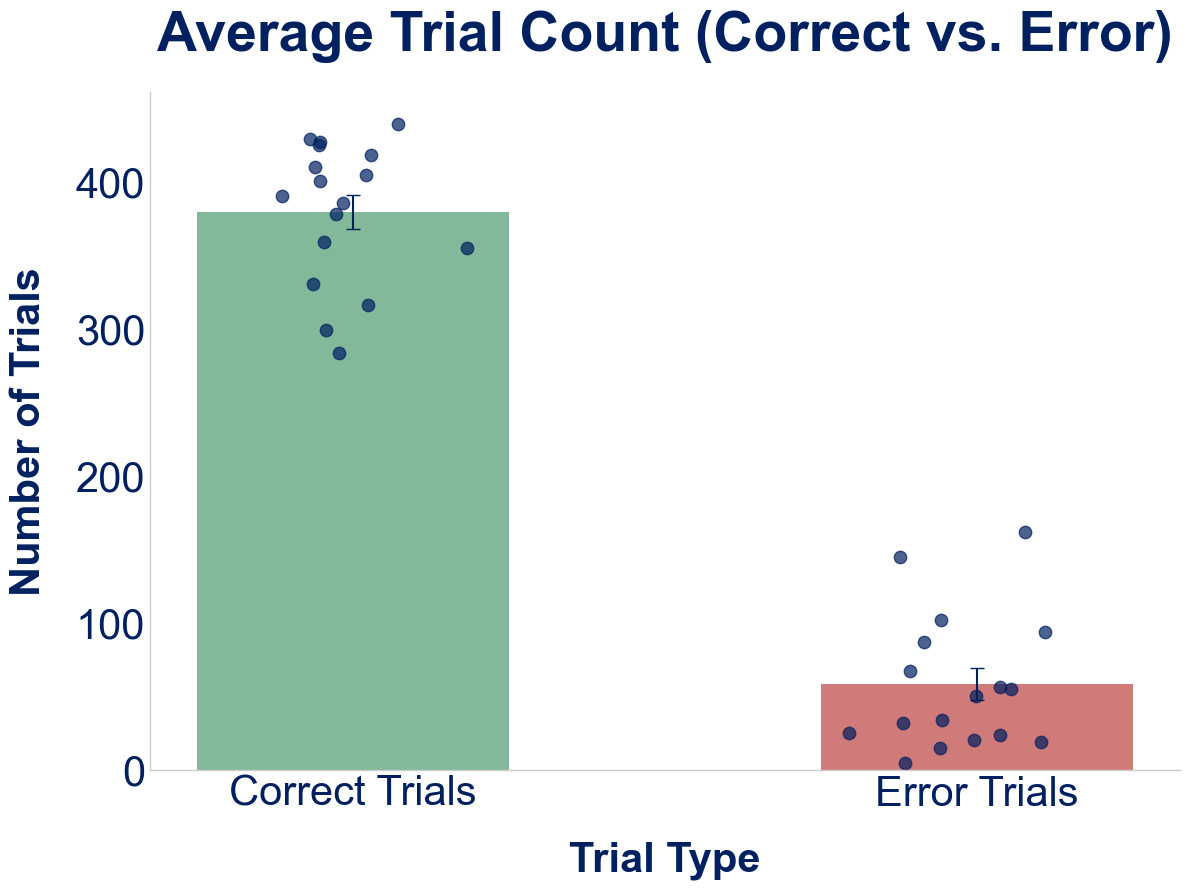

In [55]:
#Bar plot version trial counts
# --- Calculate Overall Averages and Standard Error of the Mean (SEM) ---
avg_correct = subject_stats['correct_trials'].mean()
sem_correct = subject_stats['correct_trials'].sem()

avg_error = subject_stats['error_trials'].mean()
sem_error = subject_stats['error_trials'].sem()

#set text color
text_color = "#002060"


# --- Plotting Section ---

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 9))
plt.style.use('seaborn-v0_8-whitegrid')

# --- Plot the main bars for the averages with error bars ---
categories = ['Correct Trials', 'Error Trials']
averages = [avg_correct, avg_error]
errors = [sem_correct, sem_error]
colors = ['seagreen', 'firebrick']

ax.bar(categories, averages, yerr=errors, color=colors, width=0.5, alpha=0.6, 
       zorder=1, capsize=5, ecolor=text_color)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Overlay the individual subject dots ---
# Add a small amount of random "jitter" to the x-axis to prevent dots from overlapping
jitter_strength = 0.08
x_jitter_correct = np.random.normal(0, jitter_strength, size=len(subject_stats))
x_jitter_error = np.random.normal(1, jitter_strength, size=len(subject_stats))

# Plot the dots
ax.scatter(x_jitter_correct, subject_stats['correct_trials'], s=80, 
           color=text_color, alpha=0.7, zorder=2, label='Individual Subjects')
ax.scatter(x_jitter_error, subject_stats['error_trials'], s=80, 
           color=text_color, alpha=0.7, zorder=2)


# --- Final Formatting ---
ax.set_ylabel('Number of Trials', fontweight='bold', fontsize=30, color=text_color, labelpad=20)
ax.set_xlabel('Trial Type', fontweight='bold', fontsize=30, color=text_color, labelpad=20)
ax.set_title('Average Trial Count (Correct vs. Error)', fontweight='bold', fontsize=40, pad=30, color=text_color)

ax.tick_params(axis='x', labelsize=30, colors=text_color) 
ax.tick_params(axis='y', labelsize=30, colors=text_color)


plt.tight_layout()
plt.show()




Paired T-Test Results:
T-statistic: -5.756
P-value: 2.9508324665946996e-05
1250.9751823315985
1439.240359035053


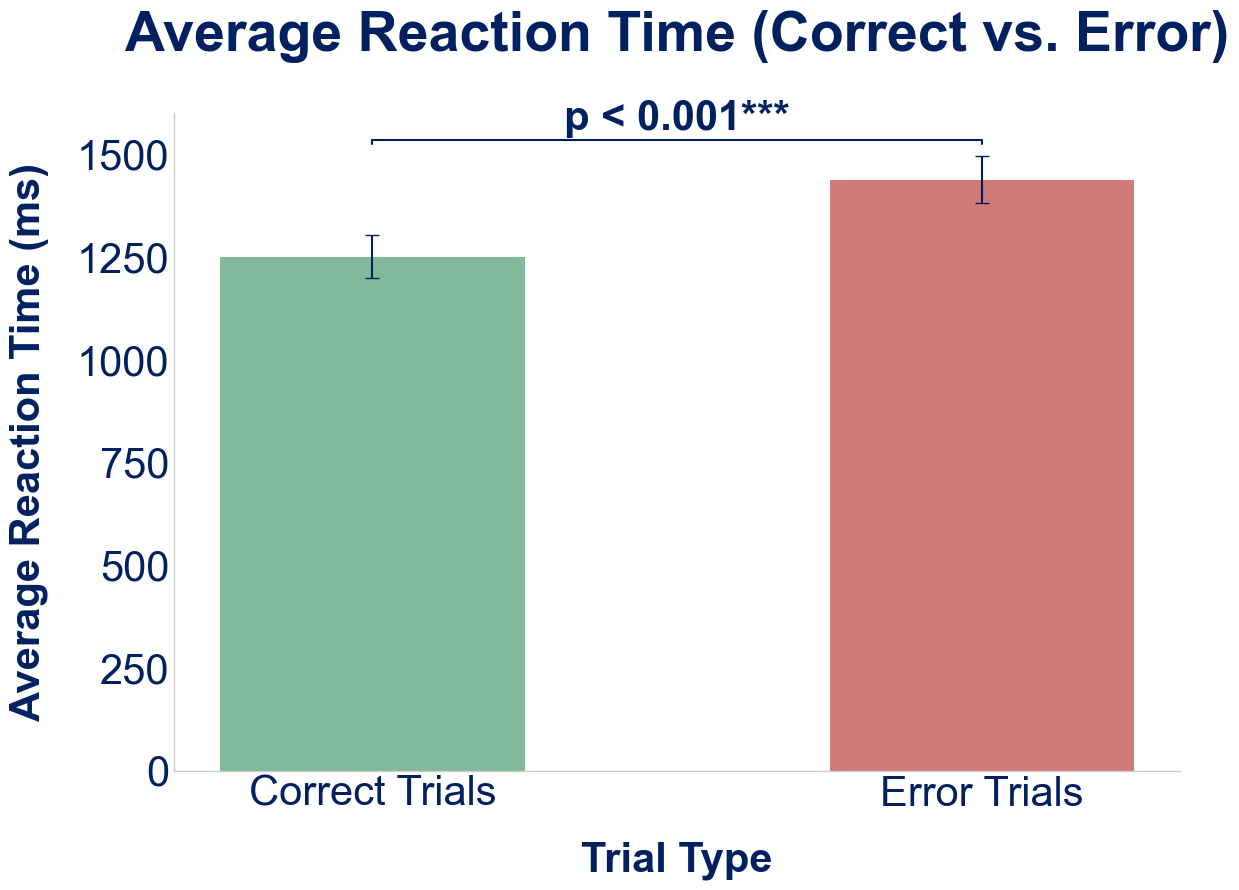

In [62]:
import matplotlib.ticker as ticker

# --- 1. Calculate Average RT for Correct and Error trials PER SUBJECT ---
rt_by_condition = responded_trials.groupby(['subject_ID', 'acc'])['RT'].mean().unstack()
rt_by_condition.columns = ['avg_RT_error', 'avg_RT_correct']

# Drop subjects that might not have both conditions (e.g., no errors)
rt_by_condition.dropna(inplace=True)

# --- 2. Perform the Paired T-Test ---
t_statistic, p_value = ttest_rel(rt_by_condition['avg_RT_correct'], rt_by_condition['avg_RT_error'])

print("Paired T-Test Results:")
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value}")

# --- 3. Calculate Overall Averages and Errors for Plotting ---
avg_rt_correct = rt_by_condition['avg_RT_correct'].mean()
sem_rt_correct = rt_by_condition['avg_RT_correct'].sem()
print(avg_rt_correct)

avg_rt_error = rt_by_condition['avg_RT_error'].mean()
sem_rt_error = rt_by_condition['avg_RT_error'].sem()
print(avg_rt_error)

# --- 4. Plotting Section ---
fig, ax = plt.subplots(figsize=(12, 9))
plt.style.use('seaborn-v0_8-whitegrid')
text_color = "#002060"
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Plot the main data first ---
categories = ['Correct Trials', 'Error Trials']
values = [avg_rt_correct, avg_rt_error]
errors = [sem_rt_correct, sem_rt_error]
colors = ['seagreen', 'firebrick']

ax.bar(categories, values, yerr=errors, color=colors, alpha=0.6, width=0.5, capsize=5, ecolor=text_color)

# --- Add text labels above the error bars and find the highest point ---
highest_point = 0
for i, (value, error) in enumerate(zip(values, errors)):
    text_y = value + error + 20 
    #ax.text(i, text_y, f'{value:.1f} ± {error:.1f} ms', ha='center', va='bottom', fontsize=25, fontweight='bold', color=text_color)
    # Keep track of the highest point on the plot
    if text_y > highest_point:
        highest_point = text_y

# --- Add annotation for the p-value with stars ---
# Position the annotation line relative to the highest element on the plot
line_y = highest_point + 20
text_y = highest_point + 25
tick_height = 10

# Draw the horizontal bar and ticks
ax.plot([0, 1], [line_y, line_y], color=text_color, lw=1.5)
ax.plot([0, 0], [line_y - tick_height, line_y], color=text_color, lw=1.5)
ax.plot([1, 1], [line_y - tick_height, line_y], color=text_color, lw=1.5)

# Determine the star notation
if p_value < 0.001:
    p_text = 'p < 0.001***'
elif p_value < 0.01:
    p_text = '**'
elif p_value < 0.05:
    p_text = '*'
else:
    p_text = 'n.s.'

# Add the star text
ax.text(0.5, text_y, p_text, ha='center', va='bottom', fontsize=30, fontweight='bold', color=text_color)

# --- Final Formatting ---
ax.set_ylabel('Average Reaction Time (ms)', fontweight='bold', fontsize=30, color=text_color, labelpad=20)
ax.set_xlabel('Trial Type', fontweight='bold', fontsize=30, color=text_color, labelpad=20)
ax.set_title('Average Reaction Time (Correct vs. Error)', fontweight='bold', fontsize=40, pad=45, color=text_color)
ax.tick_params(axis='x', labelsize=30, colors=text_color) 
ax.tick_params(axis='y', labelsize=30, colors=text_color)
ax.set_ylim(0, 1600) 

plt.tight_layout()
plt.show()

